         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

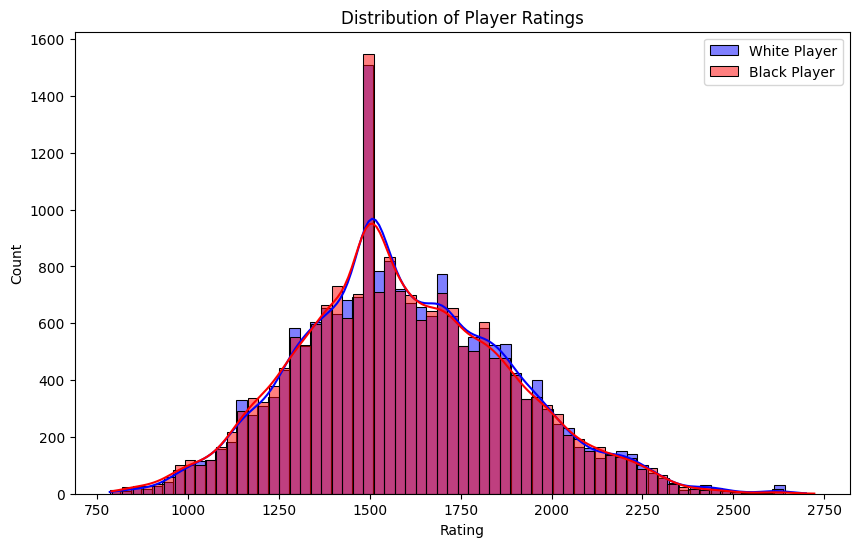

True     16155
False     3903
Name: rated, dtype: int64


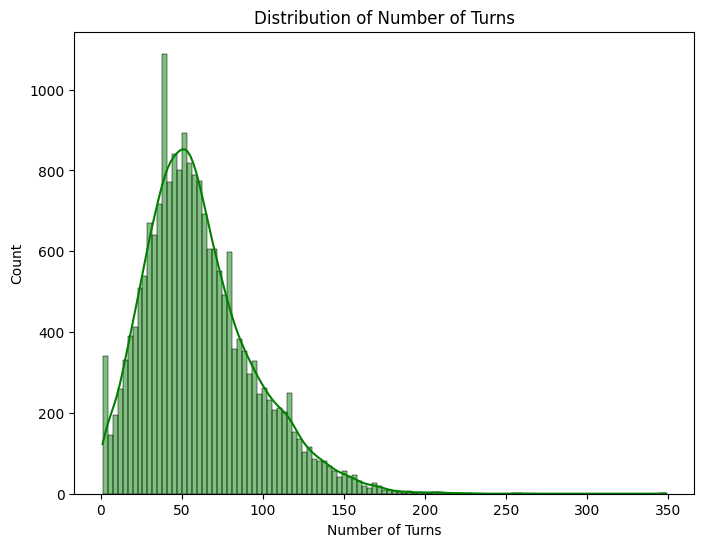

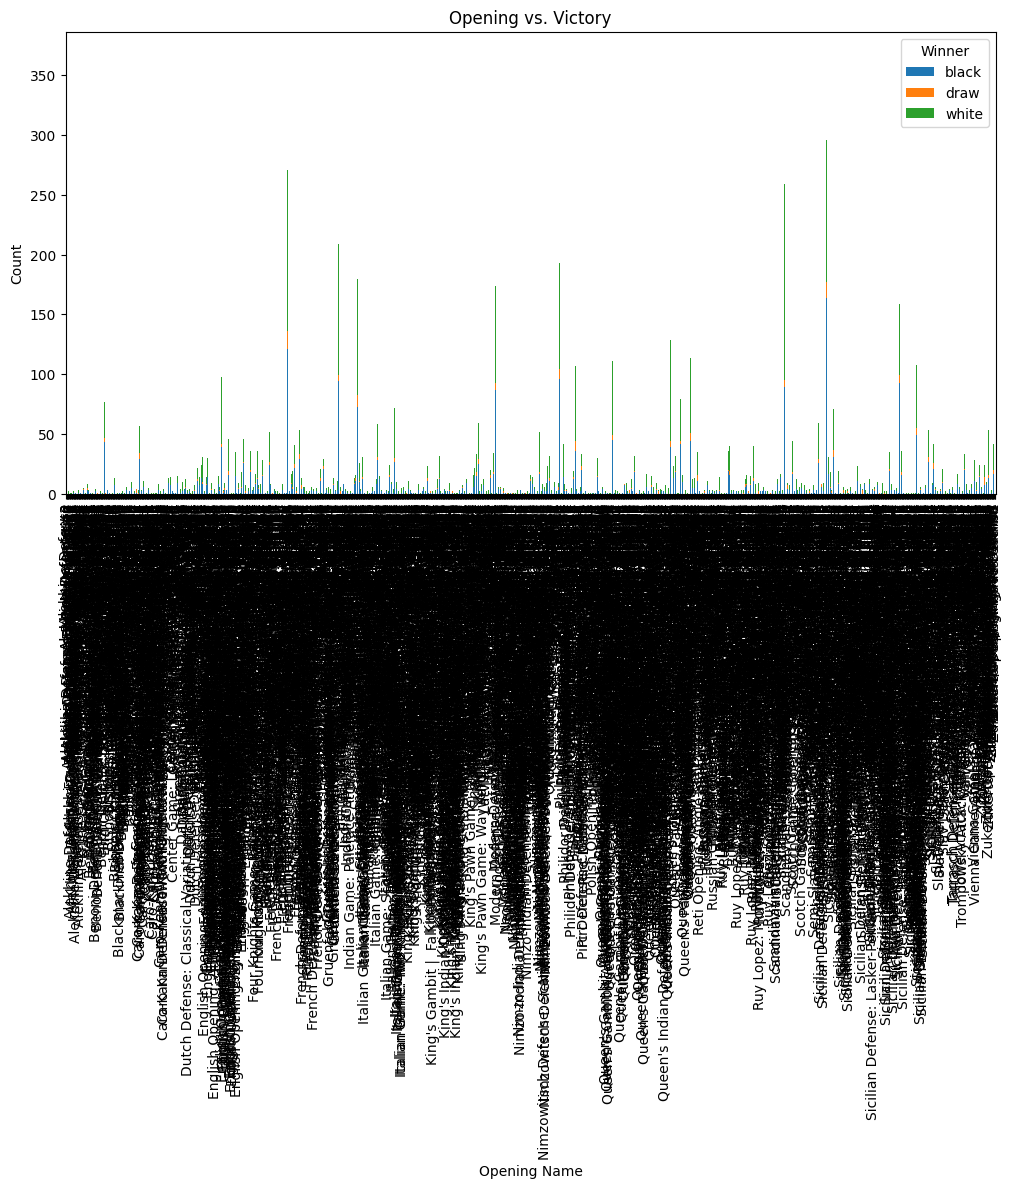

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('games.csv')

# Overview of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check missing values
print(data.isnull().sum())

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='white_rating', kde=True, color='blue', label='White Player')
sns.histplot(data=data, x='black_rating', kde=True, color='red', label='Black Player')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Player Ratings')
plt.legend()
plt.show()

# Count the number of rated and unrated games
rated_counts = data['rated'].value_counts()
print(rated_counts)

# Visualize the number of turns
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='turns', kde=True, color='green')
plt.xlabel('Number of Turns')
plt.ylabel('Count')
plt.title('Distribution of Number of Turns')
plt.show()

# Explore the relationship between openings and victory
opening_victory = data.groupby('opening_name')['winner'].value_counts().unstack()
opening_victory.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Opening Name')
plt.ylabel('Count')
plt.title('Opening vs. Victory')
plt.legend(title='Winner', loc='upper right')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('games.csv')

# Split moves into separate columns
moves_df = data['moves'].str.split(expand=True)

# Rename the columns as move1, move2, move3, ...
moves_df.columns = [f'move{i+1}' for i in range(moves_df.shape[1])]

# Create a new dataframe with the extracted moves
moves_data = pd.concat([data[['id', 'rated', 'created_at', 'last_move_at']], moves_df], axis=1)

# Print the new dataframe
print(moves_data.head())

# Convert dataframe to CSV
moves_data.to_csv('moves_data.csv', index=False)

         id  rated    created_at  last_move_at move1 move2 move3 move4 move5  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12    d4    d5    c4    c6  cxd5   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12    d4   Nc6    e4    e5    f4   
2  mIICvQHh   True  1.504130e+12  1.504130e+12    e4    e5    d3    d6   Be3   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12    d4    d5   Nf3   Bf5   Nc3   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12    e4    e5   Nf3    d6    d4   

  move6  ... move340 move341 move342 move343 move344 move345 move346 move347  \
0    e6  ...    None    None    None    None    None    None    None    None   
1    f6  ...    None    None    None    None    None    None    None    None   
2    c6  ...    None    None    None    None    None    None    None    None   
3   Nf6  ...    None    None    None    None    None    None    None    None   
4   Nc6  ...    None    None    None    None    None    None    None    None   

  move348 move349  
0    None    None 

In [ ]:
from google.colab import files

files.download('moves_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('games.csv')

# Convert 'created_at' and 'last_move' to datetime format
data['created_at'] = pd.to_datetime(data['created_at'].astype(int) // 1000, unit='s')
data['last_move_at'] = pd.to_datetime(data['last_move_at'].astype(int) // 1000, unit='s')

# Verify the new format
print(data['created_at'].head())
print(data['last_move_at'].head())

# Save the updated dataset to a new CSV file
data.to_csv('updated_dataset.csv', index=False)

from google.colab import files

files.download('updated_dataset.csv')

0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
3   2017-08-30 16:20:00
4   2017-08-29 18:06:40
Name: created_at, dtype: datetime64[ns]
0   2017-08-31 20:06:40
1   2017-08-30 21:53:20
2   2017-08-30 21:53:20
3   2017-08-30 16:20:00
4   2017-08-29 18:06:40
Name: last_move_at, dtype: datetime64[ns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

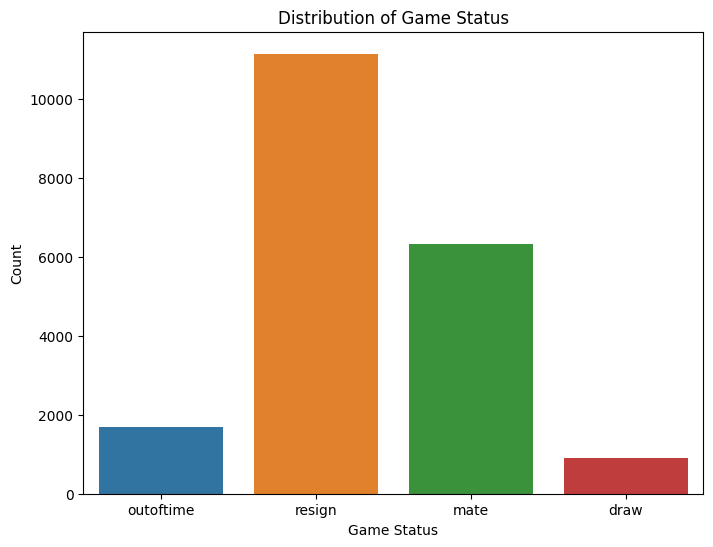

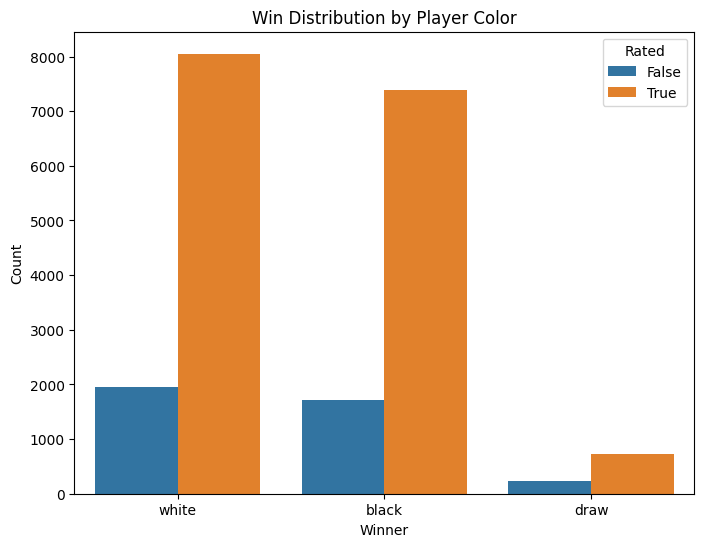

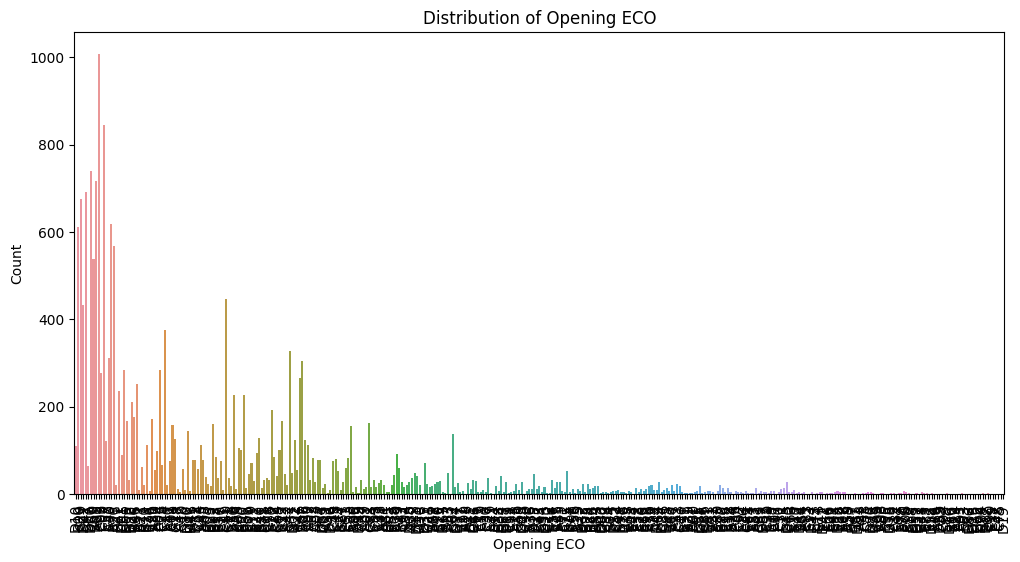

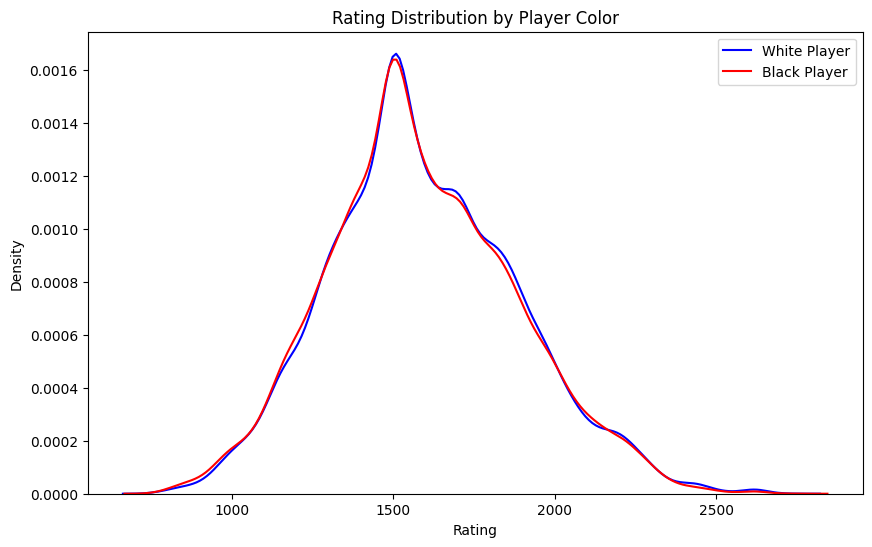

In [ ]:
#Visualizations:

#Game Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='victory_status')
plt.xlabel('Game Status')
plt.ylabel('Count')
plt.title('Distribution of Game Status')
plt.show()

#Win Distribution by Player Color
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='winner', hue='rated')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.title('Win Distribution by Player Color')
plt.legend(title='Rated', loc='upper right')
plt.show()

#Opening ECO Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='opening_eco')
plt.xlabel('Opening ECO')
plt.ylabel('Count')
plt.title('Distribution of Opening ECO')
plt.xticks(rotation=90)
plt.show()

#Rating Distribution by Player Color
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='white_rating', color='blue', label='White Player')
sns.kdeplot(data=data, x='black_rating', color='red', label='Black Player')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution by Player Color')
plt.legend()
plt.show()


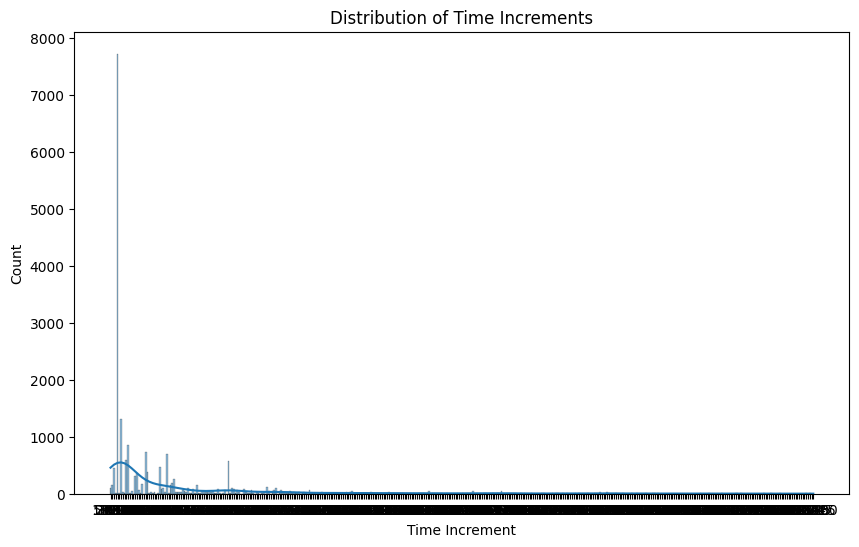

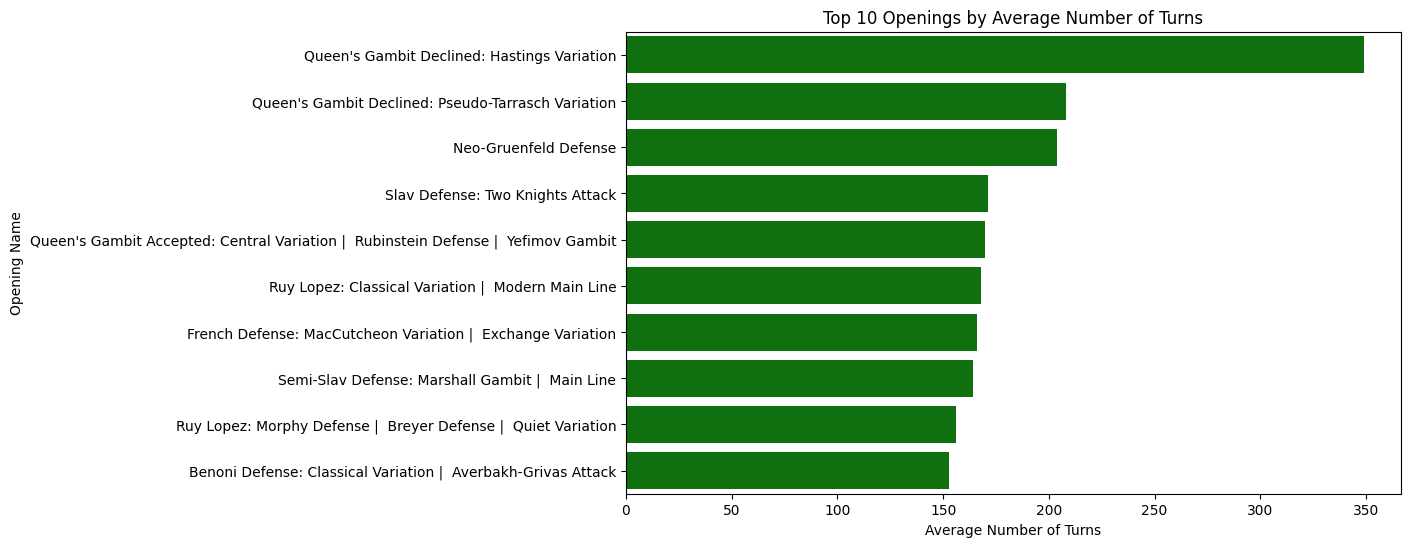

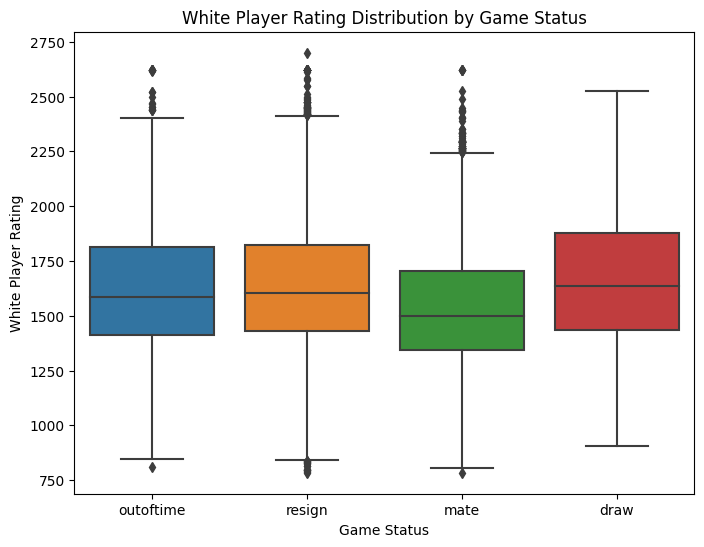

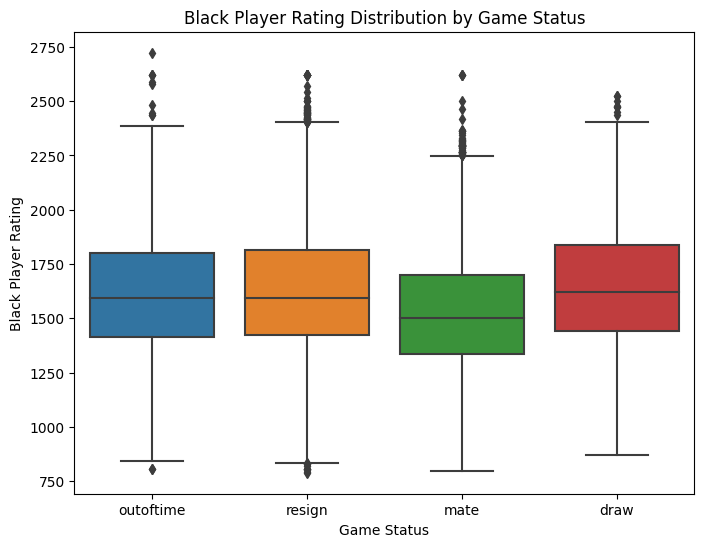

In [ ]:
#Distribution of Time Increments
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='increment_code', bins=20, kde=True)
plt.xlabel('Time Increment')
plt.ylabel('Count')
plt.title('Distribution of Time Increments')
plt.show()

#Average Number of Turns by Opening Name
avg_turns_by_opening = data.groupby('opening_name')['turns'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_turns_by_opening.values, y=avg_turns_by_opening.index, color='green')
plt.xlabel('Average Number of Turns')
plt.ylabel('Opening Name')
plt.title('Top 10 Openings by Average Number of Turns')
plt.show()

#White Player Rating Distribution by Game Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='victory_status', y='white_rating')
plt.xlabel('Game Status')
plt.ylabel('White Player Rating')
plt.title('White Player Rating Distribution by Game Status')
plt.show()

#Black Player Rating Distribution by Game Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='victory_status', y='black_rating')
plt.xlabel('Game Status')
plt.ylabel('Black Player Rating')
plt.title('Black Player Rating Distribution by Game Status')
plt.show()


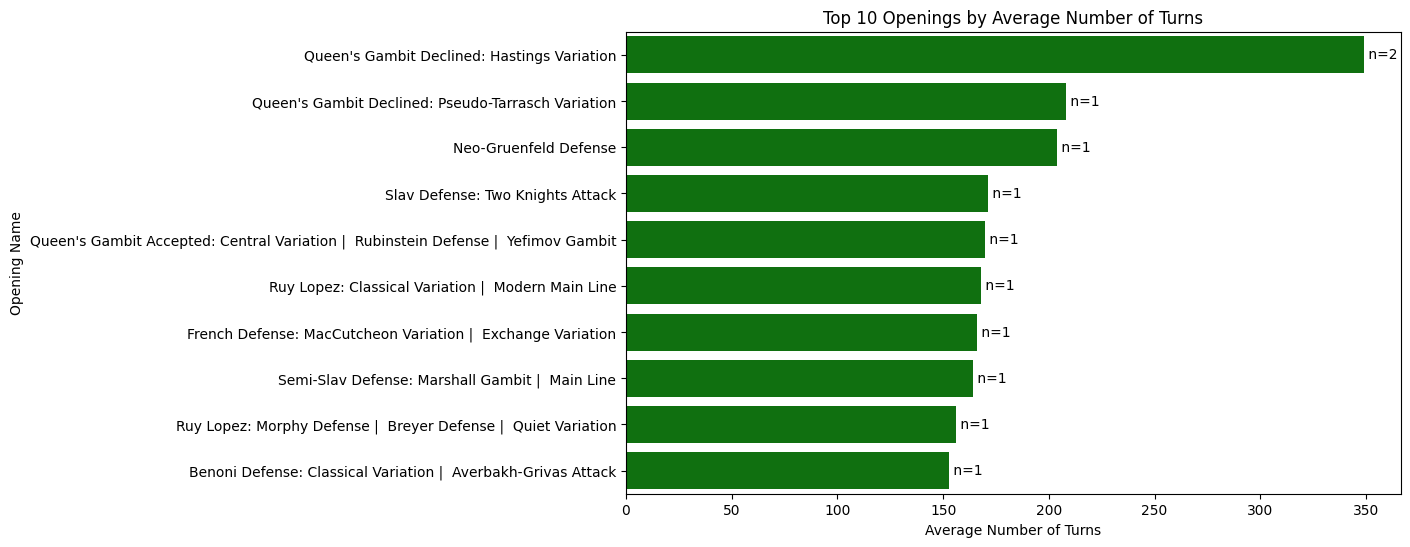

In [ ]:
# Average Number of Turns by Opening Name
avg_turns_by_opening = data.groupby('opening_name')['turns'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_turns_by_opening['mean'], y=avg_turns_by_opening.index, color='green')
plt.xlabel('Average Number of Turns')
plt.ylabel('Opening Name')
plt.title('Top 10 Openings by Average Number of Turns')
# Add count as annotations
for i, count in enumerate(avg_turns_by_opening['count']):
    plt.text(x=avg_turns_by_opening['mean'].iloc[i], y=i, s=f' n={count}', va='center')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Perform feature engineering
# Example: Encode categorical features
categorical_cols = ['rated', 'victory_status', 'winner']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the dataset into features and target variable
X = data.drop(['winner'], axis=1)
y = data['winner']


In [ ]:
import pandas as pd

# Extract the starting name of the openings
data['opening_name'] = data['opening_name'].str.split(':').str[0].str.strip()
data['opening_name'] = data['opening_name'].str.split('|').str[0].str.strip()

# Print the modified opening names
print(data['opening_name'])

0               Slav Defense
1        Nimzowitsch Defense
2           King's Pawn Game
3          Queen's Pawn Game
4           Philidor Defense
                ...         
20053          Dutch Defense
20054           Queen's Pawn
20055      Queen's Pawn Game
20056           Pirc Defense
20057      Queen's Pawn Game
Name: opening_name, Length: 20058, dtype: object


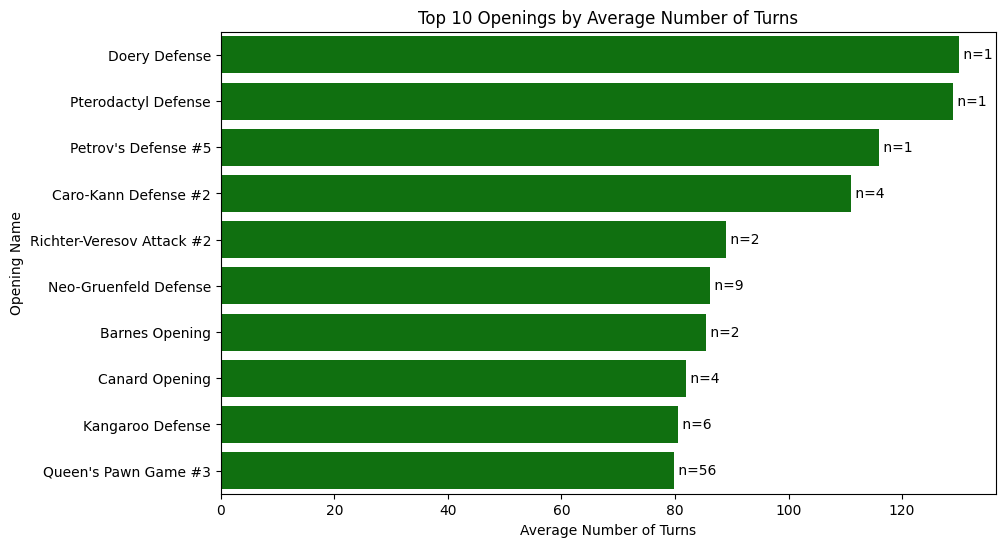

In [ ]:
# Average Number of Turns by Opening Name
avg_turns_by_opening = data.groupby('opening_name')['turns'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_turns_by_opening['mean'], y=avg_turns_by_opening.index, color='green')
plt.xlabel('Average Number of Turns')
plt.ylabel('Opening Name')
plt.title('Top 10 Openings by Average Number of Turns')
# Add count as annotations
for i, count in enumerate(avg_turns_by_opening['count']):
    plt.text(x=avg_turns_by_opening['mean'].iloc[i], y=i, s=f' n={count}', va='center')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize the moves and obtain the word index mapping
tokenizer = Tokenizer(filters='', lower=False)
tokenizer.fit_on_texts(data['moves'])

# Prepare the data for sequence-to-sequence model
moves = tokenizer.texts_to_sequences(data['moves'])
next_moves = [move[1:] for move in moves]
moves = [move[:-1] for move in moves]
X = pad_sequences(moves, padding='post')
y = pad_sequences(next_moves, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(TimeDistributed(Dense(units=len(tokenizer.word_index) + 1, activation='softmax')))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, np.expand_dims(y_train, -1), epochs=10, batch_size=32, validation_data=(X_test, np.expand_dims(y_test, -1)))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, np.expand_dims(y_test, -1))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/10
502/502 [==============================] - 906s 2s/step - loss: 1.7968 - accuracy: 0.8260 - val_loss: 1.1148 - val_accuracy: 0.8284
Epoch 2/10
502/502 [==============================] - 917s 2s/step - loss: 1.0631 - accuracy: 0.8334 - val_loss: 1.0348 - val_accuracy: 0.8352
Epoch 3/10
502/502 [==============================] - 916s 2s/step - loss: 1.0031 - accuracy: 0.8369 - val_loss: 0.9913 - val_accuracy: 0.8367
Epoch 4/10
502/502 [==============================] - 858s 2s/step - loss: 0.9665 - accuracy: 0.8387 - val_loss: 0.9570 - val_accuracy: 0.8386
Epoch 5/10
  1/502 [..............................] - ETA: 12:25 - loss: 1.0206 - accuracy: 0.8244